In [146]:
import sys

!{sys.executable} -m pip install numpy

## Rough Notes
1. Read the dataset and analzye the quantity of type A tomatoes
2. We only consider entries from 19/02/2020 till 29/05/2020 since all teams have data within that timeframe.
3. We take into account type A tomatoes which can be commercially traded.

## Choice of dataset
We have datasets from 6 teams and to build our model we need to pick the dataset generated by the team which produces the most type A tomatoes since that has the optimum parameters. Below, we analyse the total production of type A tomatoes across the different teams to chose the dataset with which we work on during model building.

In [88]:
import pandas as pd

pd.options.mode.chained_assignment = None

the_automators_df = pd.read_csv("../dataset/automators_production.csv")

the_automators_df.head(10)

,time,ProdA,ProdB,avg_nr_harvested_trusses,Truss development time,Nr_fruits_ClassA,Weight_fruits_ClassA,Nr_fruits_ClassB,Weight_fruits_ClassB
0,43880.04,0.037,0.0,0.1,50.0,NaN,128.0,0,0
1,43885.04,0.767,0.0,0.9,54.5,136.0,1271.0,0,0
2,43889.04,0.232,0.0,0.6,51.0,89.0,788.0,0,0
3,43894.04,0.778,0.0,1.5,55.1,226.0,2001.0,0,0
4,43899.04,0.248,0.0,0.9,53.6,133.0,1144.0,0,0
5,43903.04,0.354,0.0,0.7,52.4,83.0,811.0,0,0
6,43908.04,0.795,0.0,1.0,53.3,126.0,1230.0,0,0
7,43913.04,0.486,0.0,0.9,54.9,148.0,1297.5,0,0
8,43917.04,0.454,0.0,0.9,52.6,126.0,1069.0,0,0
9,43922.00,0.697,0.0,0.6,54.0,92.0,777.0,0,0


In [128]:
import xlrd
import pandas as pd

def load_data(csv_file):
    df = pd.read_csv(csv_file)
    return df

# convert from excel date format to datetime
def convert_xldate_to_datetime(xl_date):
    datetime = xlrd.xldate_as_datetime(xl_date, 0)
    date = datetime.date()
    return date

def preprocess_prod_df(df):
    # remove rows for which all entries are NaN
    df = df.dropna(axis=0, how="all")
    # convert excel date entries into datetime  
    df["time"] = df["time"].apply(lambda x: convert_xldate_to_datetime(x))
    # convert kg/m to kg 
    df["ProdA"] = df["ProdA"].apply(lambda x: x*62.5)
    # set the index of the df to time
    df.set_index("time", inplace=True)
    return df

# get the total amount of type A tomatoes produced 
def get_production(df):
    from_date = datetime.strptime("2020-02-19", "%Y-%m-%d").date()
    to_date = datetime.strptime("2020-05-29", "%Y-%m-%d").date()
    total_prod = df.loc[from_date:to_date, "ProdA"].sum()
    return total_prod

In [130]:
the_automators_df

,ProdA,ProdB,avg_nr_harvested_trusses,Truss development time,Nr_fruits_ClassA,Weight_fruits_ClassA,Nr_fruits_ClassB,Weight_fruits_ClassB
time,,,,,,,,
2020-02-19,2.3125,0.000,0.1,50.0,NaN,128.0,0,0
2020-02-24,47.9375,0.000,0.9,54.5,136.0,1271.0,0,0
2020-02-28,14.5000,0.000,0.6,51.0,89.0,788.0,0,0
2020-03-04,48.6250,0.000,1.5,55.1,226.0,2001.0,0,0
2020-03-09,15.5000,0.000,0.9,53.6,133.0,1144.0,0,0
2020-03-13,22.1250,0.000,0.7,52.4,83.0,811.0,0,0
2020-03-18,49.6875,0.000,1.0,53.3,126.0,1230.0,0,0
2020-03-23,30.3750,0.000,0.9,54.9,148.0,1297.5,0,0
2020-03-27,28.3750,0.000,0.9,52.6,126.0,1069.0,0,0


### Load, preprocess and extract the total amount of type tomatoes by each team

In [129]:
# team TheAutomators
the_automators_df = load_data("../dataset/automators_production.csv")
the_automators_df = preprocess_prod_df(the_automators_df)
automators_produce = get_production(the_automators_df)

# team Grower
grower_df = load_data("../dataset/grower_production.csv")
grower_df = preprocess_prod_df(grower_df)
grower_produce = get_production(grower_df)

# team Digilog
digilog_df = load_data("../dataset/digilog_production.csv")
digilog_df = preprocess_prod_df(digilog_df)
digilog_produce = get_production(digilog_df)

# team AICU
aicu_df = load_data("../dataset/aicu_production.csv")
aicu_df = preprocess_prod_df(aicu_df)
aicu_produce = get_production(aicu_df)

# team IUACAAS
iuacaas_df = load_data("../dataset/iuacaas_production.csv")
iuacaas_df = preprocess_prod_df(iuacaas_df)
iuacaas_produce = get_production(iuacaas_df)

# team Automatoes
automatoes_df = load_data("../dataset/automatoes_production.csv")
automatoes_df = preprocess_prod_df(automatoes_df)
automatoes_produce = get_production(automatoes_df)

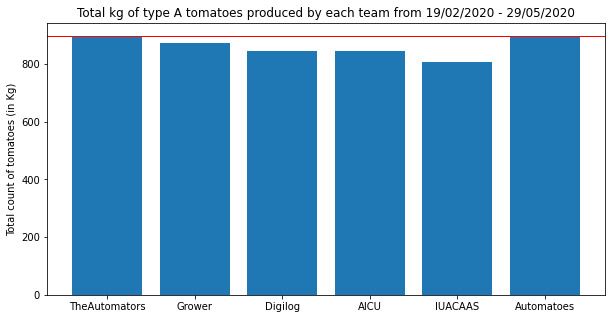

In [151]:
import matplotlib.pyplot as plt
import numpy as np

teams = ["TheAutomators", "Grower", "Digilog", "AICU", "IUACAAS", "Automatoes"]
total_produce = [automators_produce, grower_produce, digilog_produce, aicu_produce, iuacaas_produce, automatoes_produce]
threshold = np.array(total_produce).max()

plt.figure(figsize=(10,5))
plt.bar(teams, total_produce)
plt.axhline(y=threshold, linewidth=1, color='r')
plt.title("Total kg of type A tomatoes produced by each team from 19/02/2020 - 29/05/2020")
plt.ylabel("Total count of tomatoes (in Kg)")
plt.show()

### Finding

Since **TheAutomators** and **Automatoes** yeild the highest amout of tomatoes during the given time period, we want to consider their environment conditions (especially the **GreenHouse Climate** conditions) to train an efficient forecasting model. However, if our model is underfit, then we can also include the dataset from
remaining teams as well since the margin of difference is rather small. 

<span style="color:red">Suggestion</span>:

We can decide on a threshold, based on the amount of type A tomatoes generated, which "qualifies" a team's dataset and in turn it's environmental conditions as gold standard such that only these conditions can be taken into account during training a ML/DNN model. 